

# Investigating a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue. This dataset will be analysed to come to conclusions towards the following questions:


## Questions
<p>1) Movies with higher budgets tend to have higher revenues?</p>
<p>2) Does number of votes influence average score?</p>
<p>3) Does Revenueinfluence average score?</p>
<p>4) Which genres are most popular?</p>


In [179]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


  ## Data Wrangling and Cleaning
    
 

In [180]:
# Loading Data
df = pd.read_csv('tmdb-movies.csv')

#   Data Visual
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


First we will check the number of null values:

In [181]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We can see there is a lot of data with null values. Before working with null values we wil drop columns which will not be needed for the analysis. This are imdb_id, homepage, tagline, keywords, overview and production_companies .

In [182]:
df.drop(['imdb_id','homepage','tagline','keywords','production_companies'], axis=1, inplace=True)

In [183]:
df.drop('overview', axis=1, inplace=True)

We check the columns have been dropped properly

In [184]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We check again for null values and general info about the dataframe.

In [185]:
df.shape

(10866, 15)

In [186]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

As there are 10866 columns, information containing null values represent less than 1% of the data. For this reason I decide to drop columns to work with a clean data frame with no null values.

In [187]:
df.dropna(inplace=True)

Check if columns have null Values

In [188]:
df.isnull().sum().any()

False

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10732 non-null  int64  
 1   popularity      10732 non-null  float64
 2   budget          10732 non-null  int64  
 3   revenue         10732 non-null  int64  
 4   original_title  10732 non-null  object 
 5   cast            10732 non-null  object 
 6   director        10732 non-null  object 
 7   runtime         10732 non-null  int64  
 8   genres          10732 non-null  object 
 9   release_date    10732 non-null  object 
 10  vote_count      10732 non-null  int64  
 11  vote_average    10732 non-null  float64
 12  release_year    10732 non-null  int64  
 13  budget_adj      10732 non-null  float64
 14  revenue_adj     10732 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


We have a database with no null values. Now it is time to check for duplicates:

In [190]:
df.duplicated().sum()

1

There is only one column duplicated, we will proceed to drop it:

In [191]:
df.drop_duplicates(inplace=True)

In [192]:
df.duplicated().sum()

0

Let's take a look at the data

In [193]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1) Do films with higher budgets have higher revenues?

First we will take a look at the Budget and revenue columns

In [194]:
df.describe().budget

count    1.073100e+04
mean     1.480365e+07
std      3.106456e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.600000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [195]:
df.describe().revenue

count    1.073100e+04
mean     4.031989e+07
std      1.176524e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+07
max      2.781506e+09
Name: revenue, dtype: float64

Clearly we have problems with this columns as many films appear to have 0 budget or revenue. This might be missing data as it is not common for movies to have no budget or revenues. We can check the 50% mark is still 0, that means a lot of zero values. Dropping them would mean dropping to many columns. For this reason I will set them as null values.

In [196]:
df['budget']=df['budget'].replace(0, np.NAN)
df['revenue']=df['revenue'].replace(0, np.NAN)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          5153 non-null   float64
 3   revenue         4843 non-null   float64
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_count      10731 non-null  int64  
 11  vote_average    10731 non-null  float64
 12  release_year    10731 non-null  int64  
 13  budget_adj      10731 non-null  float64
 14  revenue_adj     10731 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 1.3+ MB


In [198]:
df.describe().budget

count    5.153000e+03
mean     3.082824e+07
std      3.893199e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.750000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [199]:
df.describe().revenue

count    4.843000e+03
mean     8.933981e+07
std      1.621546e+08
min      2.000000e+00
25%      7.779664e+06
50%      3.191160e+07
75%      1.000000e+08
max      2.781506e+09
Name: revenue, dtype: float64

It is clear that revenue and budget have more appropiate ranges now.
We will set budget ranges now. This will assign movies to a particular range ranging from low to high.

In [200]:
bin_edges = [2.000000e+00 , 7.779664e+06 ,3.191160e+07,1.000000e+08 ,2.781506e+09]

In [201]:
bin_names = [ 'low','medium','high' ,'very_high' ]

In [202]:
df['budget_segment'] = pd.cut(df['budget'], bin_edges, labels=bin_names)

In [204]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_segment
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,very_high
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,very_high
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,very_high
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,very_high
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,very_high


With this we have succesfully created a budget segment column. We will use groupby to give as a first impression if higher budgets are associated with higher revenues.

Text(0, 0.5, 'Revenue')

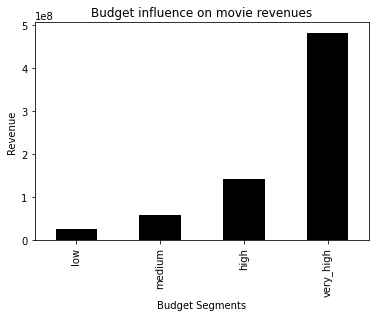

In [215]:
df.groupby('budget_segment')['revenue'].mean().plot(kind='bar',title='Budget influence on movie revenues', color=['black'])
plt.xlabel('Budget Segments')
plt.ylabel('Revenue')
                                                                                                                  

With this info we can check that movies with higher budgets tend to generate higher revenues.


### 2) Does number of votes influence average score?

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              10731 non-null  int64   
 1   popularity      10731 non-null  float64 
 2   budget          5153 non-null   float64 
 3   revenue         4843 non-null   float64 
 4   original_title  10731 non-null  object  
 5   cast            10731 non-null  object  
 6   director        10731 non-null  object  
 7   runtime         10731 non-null  int64   
 8   genres          10731 non-null  object  
 9   release_date    10731 non-null  object  
 10  vote_count      10731 non-null  int64   
 11  vote_average    10731 non-null  float64 
 12  release_year    10731 non-null  int64   
 13  budget_adj      10731 non-null  float64 
 14  revenue_adj     10731 non-null  float64 
 15  budget_segment  5148 non-null   category
dtypes: category(1), float64(6), int64(4), object(5)
memory usa

In [221]:
df.describe().vote_count

count    10731.000000
mean       219.812972
std        578.815324
min         10.000000
25%         17.000000
50%         39.000000
75%        148.000000
max       9767.000000
Name: vote_count, dtype: float64

In [223]:
df.describe().vote_average

count    10731.000000
mean         5.964710
std          0.930283
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

Data looks ok to work with.

Text(0.5, 1.0, 'Does number of votes have an impact on score')

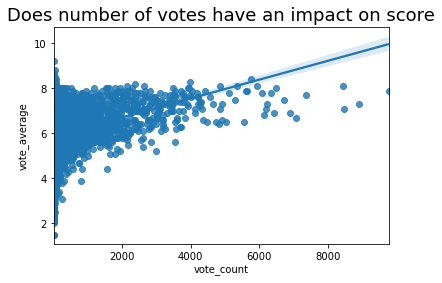

In [225]:
sns.regplot(x=df["vote_count"],y=df["vote_average"]).set_title("Number of votes impact on score",size=18)

There is a tendency that the more people vote for a particular movie the highest scores the movie shows. This suggest people decide to vote more to promote a postive review rather a negative one.

### 3) Does Revenue influence average score?

Text(0.5, 1.0, 'Does number of votes have an impact on score')

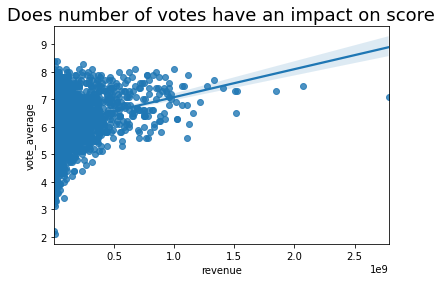

In [227]:
sns.regplot(x=df["revenue"],y=df["vote_average"]).set_title("Revenue impact on score",size=18)

Movies with higher revenues tend to be rated with a higher score.

 ### 4) Which genres are most popular?

In [250]:
popular_genres = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts()
popular_genres

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
dtype: int64

Text(0, 0.5, 'Count')

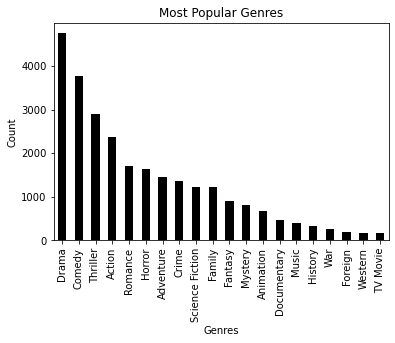

In [251]:
graph = popular_genres.plot(kind='bar',title = 'Most Popular Genres',color='black')
plt.xlabel('Genres')
plt.ylabel('Count')

It is clear that Drama is the most popular Genre, followed by Comedy and thriller.

<a id='conclusions'></a>
## Conclusions
The main findings of the analysis are the following:

<p>1) Movies with higher budgets tend to generate higher revenues.<p/>
<p>2) There is a tendency that the more people vote for a particular movie the highest scores the movie shows. This suggest people decide to vote more to promote a postive review rather a negative one.<p/>
<p>3) Movies with higher revenues tend to be rated with a higher score.<p/>
<p>4) Drama is the most popular genre, followed by Comedy and Thriller.<p/>
